In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2.Load the dataset (Employee Data)
df = pd.read_csv("../../../Downloads/Employee.csv")

## Exploratory Data Analysis

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

In [5]:
# investigate for missing values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
# another way to ceck for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
# Unique values for categorical data in the dataset
print('Gender',df['Gender'].unique())
print('Education',df['Education'].unique())
print('City',df['City'].unique())
print('PaymentTier',df['PaymentTier'].unique())
print('EverBenched',df['EverBenched'].unique())
print('JoiningYear',df['JoiningYear'].unique())

Gender ['Male' 'Female']
Education ['Bachelors' 'Masters' 'PHD']
City ['Bangalore' 'Pune' 'New Delhi']
PaymentTier [3 1 2]
EverBenched ['No' 'Yes']
JoiningYear [2017 2013 2014 2016 2015 2012 2018]


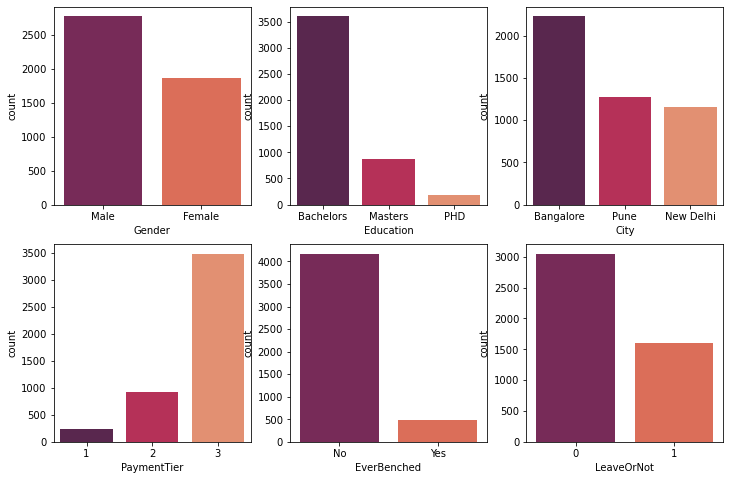

In [8]:
# create a subplot to visualize categorical data

f, axes = plt.subplots(2,3, figsize=(12,8))
sns.countplot(x=df['Gender'], data=df, palette='rocket', ax=axes[0,0])
sns.countplot(x=df['Education'], data=df, palette='rocket', ax=axes[0,1])
sns.countplot(x=df['City'], data=df, palette='rocket', ax=axes[0,2])

sns.countplot(x=df['PaymentTier'], data=df, palette='rocket', ax=axes[1,0])
sns.countplot(x=df['EverBenched'], data=df, palette='rocket', ax=axes[1,1])
sns.countplot(x=df['LeaveOrNot'], data=df, palette='rocket', ax=axes[1,2])
plt.show()

<Figure size 792x576 with 0 Axes>

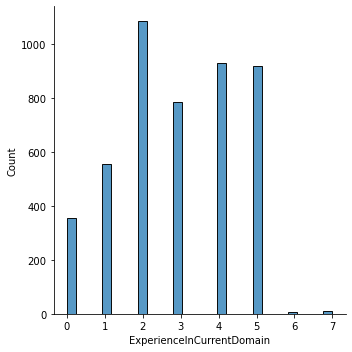

In [9]:
# Investigate the distribution of some of the numerical features.

plt.figure(figsize=(11,8))
sns.displot(df['ExperienceInCurrentDomain'])
plt.show()

<Figure size 792x576 with 0 Axes>

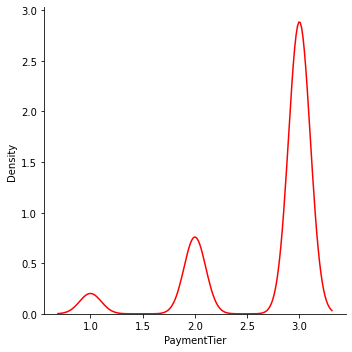

In [10]:
plt.figure(figsize=(11,8))
sns.displot(df['PaymentTier'], color='red', kind='kde') #ecdf  kind='hist' 'kde'
plt.show()

## Machine Learning -  Heart Data

In [11]:
# Transform categorical data into numerical data - using label encoder(scikit-learn)
from sklearn.preprocessing import LabelEncoder

In [12]:
le= LabelEncoder()

In [13]:
#Make copy of original before transformation.
df_original = df.copy()

In [14]:
df['ExperienceInCurrentDomain'].dtype

dtype('int64')

In [15]:
# Transformation process
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [16]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

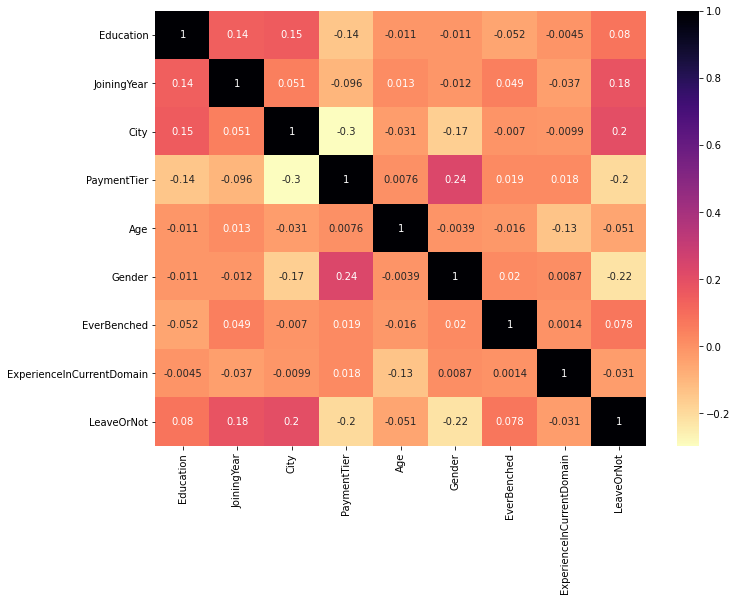

In [17]:
# Correlation of the features in the dataset
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap='magma_r')
plt.show()

In [18]:
# Split the dataset into Train and Test set
# Remove the label you want to predict

x = df.drop('LeaveOrNot', axis=1) # Data without the LABEL (Leave or Not)
y = df['LeaveOrNot'] # The LABEL (Leave Or Not)

In [19]:
# Split the dataset into Train and Test set
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

print('x_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2791, 8)
X_test:  (1862, 8)
y_train:  (2791,)
y_test:  (1862,)


In [20]:
#Import and instantiate Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

In [21]:
#Fit the train set in the adaboost algorithm
model = abc.fit(X_train,y_train)

In [22]:
#Test the model by passing test data. See predictions
pred = model.predict(X_test)
print(pred)

[0 0 1 ... 0 0 0]


In [23]:
# Check the accuracy for the model - How the test data compares to model prediction
from sklearn.metrics import accuracy_score
print('The accuracy for Adaboost', round(accuracy_score(y_test,pred)*100),'%')
#X - independent variable, y - Dependent variable
# Multicollienearity - which correlate together

The accuracy for Adaboost 79 %


In [24]:
#!pip install xgboost

In [25]:
# Import other classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Import metrics to measure mmodel accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [26]:
# List of instance of classifiers
classifiers = [
    [RandomForestClassifier(), "Random Forest"],
    [XGBClassifier(), "XGB Classifier"],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [SGDClassifier(), "SGD"],
    [SVC(), "Support Vector Machine"],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(), "Decision Tree"],
    [LogisticRegression(), "Logistics Regression"]
]

In [27]:
# Train and test dataset on a list of classifier algorithms
score_list = {}
cross_val = {}
roc_auc = {}
accuracy_s = {}
for i in classifiers:
    model = i[0]
    model.fit(X_train, y_train)
    model_name = i[1]
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    CV = cross_val_score(model, X_test, y_test).mean()
    RA = roc_auc_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    score_list[model_name] = ([str(round(score*100, 2)) + "%"])
    cross_val[model_name] = ([str(round(CV *100, 2)) + '%'])
    accuracy_s[model_name] = ([str(round(accuracy*100, 2)) + "%"])
    roc_auc[model_name] = ([str(round(RA*100, 2)) + "%"])
    if model_name != classifiers[-1][1]:
        print("")


[11:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.








C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [28]:
# Accuracy score of each classification model
print('Accuracy Score')
AS = pd.DataFrame(score_list)
AS.head()

Accuracy Score


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,82.06%,83.57%,76.53%,65.57%,65.57%,69.5%,79.75%,68.8%


In [29]:
# Measure accuracy of model using cross validation
print("Cross Validation")
#sl = pd.DataFrame(cross_val_list)
sl = pd.DataFrame(cross_val)
sl.head()

Cross Validation


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,82.98%,83.46%,75.67%,59.34%,65.57%,66.54%,79.81%,70.46%


In [30]:
# Measure accuracy of model using ROC AUC
print("roc_auc_list")
sl = pd.DataFrame(roc_auc)
sl.head()

roc_auc_list


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,78.58%,79.87%,71.1%,50.0%,50.0%,63.33%,76.56%,58.94%
